Il progetto mira a sviluppare modelli predittivi per determinare la probabilità che un cliente non riesca a ripagare un prestito, utilizzando tecniche avanzate di data science e machine learning. L'obiettivo finale è creare un sistema di credit scoring accurato e affidabile che possa supportare le istituzioni finanziarie nella gestione del rischio di credito.

Fasi del Progetto

1. Raccolta e Pulizia dei Dati
2. Selezione delle caratteristiche
3. Applicazione di algotirmi di machine learning: Random Forest e xgboost
4. Valutazione delle Performance del modello
5. Conclusione e Raccomandazioni


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

Raccolta e pulizzia

In [3]:
# Carico il dataset
dataset_path =  r'datset/credit_risk_dataset.csv'
df = pd.read_csv(dataset_path)

# Esplorazione iniziale del dataset
print(df.head())
print(df.info())
print(df.describe())


   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


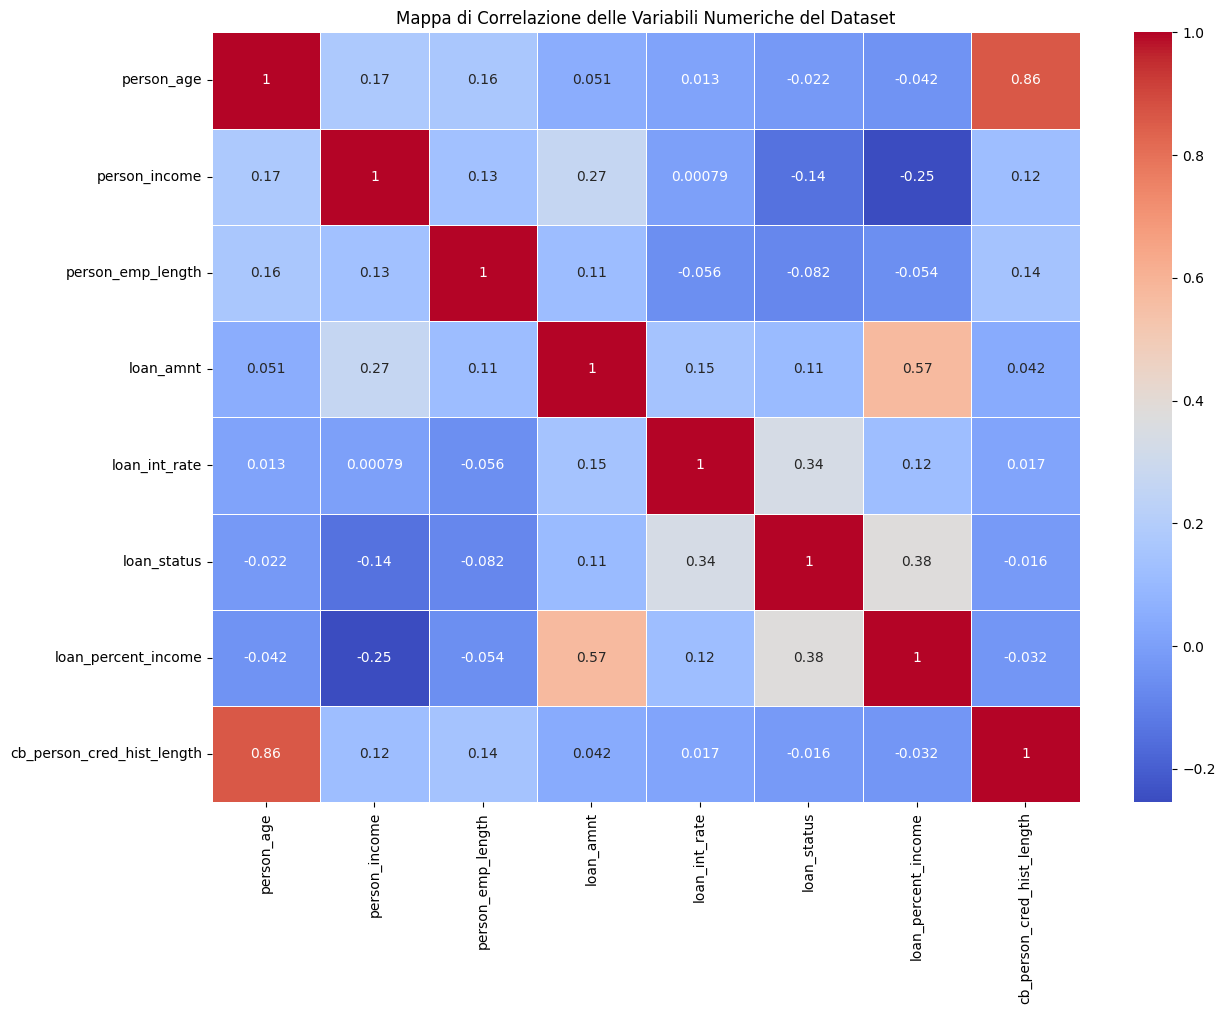

In [12]:
# Seleziono solo le colonne numeriche
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcolo della matrice di correlazione
correlation_matrix = numerical_df.corr()

# Configurazione della dimensione della figura
plt.figure(figsize=(14, 10))

# Creazione della mappa di correlazione
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Titolo della mappa di correlazione
plt.title('Mappa di Correlazione delle Variabili Numeriche del Dataset')

plt.show()


Variabili Fortemente Correlate:

1. person_age e cb_person_cred_hist_length:

Correlazione: 0.86 (forte correlazione positiva)
Descrizione: Le persone più anziane tendono ad avere una storia creditizia più lunga, il che è logico poiché hanno avuto più tempo per accumulare la storia creditizia.

2. loan_amnt e loan_percent_income:

Correlazione: 0.57 (moderata correlazione positiva)
Descrizione: Un importo del prestito più elevato è associato a una percentuale maggiore del reddito, indicando che i prestiti più grandi rappresentano una parte significativa del reddito dei richiedenti.

3. person_income e loan_amnt:

Correlazione: 0.27 (debole correlazione positiva)
Descrizione: Le persone con redditi più alti tendono ad ottenere prestiti di importi maggiori, anche se la correlazione non è molto forte.

4. loan_status e loan_int_rate:

Correlazione: 0.34 (debole correlazione positiva)
Descrizione: Prestiti con tassi di interesse più elevati tendono ad avere una maggiore probabilità di essere in default.

5. loan_status e loan_percent_income:

Correlazione: 0.38 (debole correlazione positiva)
Descrizione: I prestiti che rappresentano una percentuale maggiore del reddito del richiedente hanno una maggiore probabilità di essere in default.

6. person_income e loan_percent_income:

Correlazione: -0.25 (debole correlazione negativa)
Descrizione: Le persone con redditi più alti tendono ad avere prestiti che rappresentano una percentuale minore del loro reddito complessivo.

Variabili numeriche

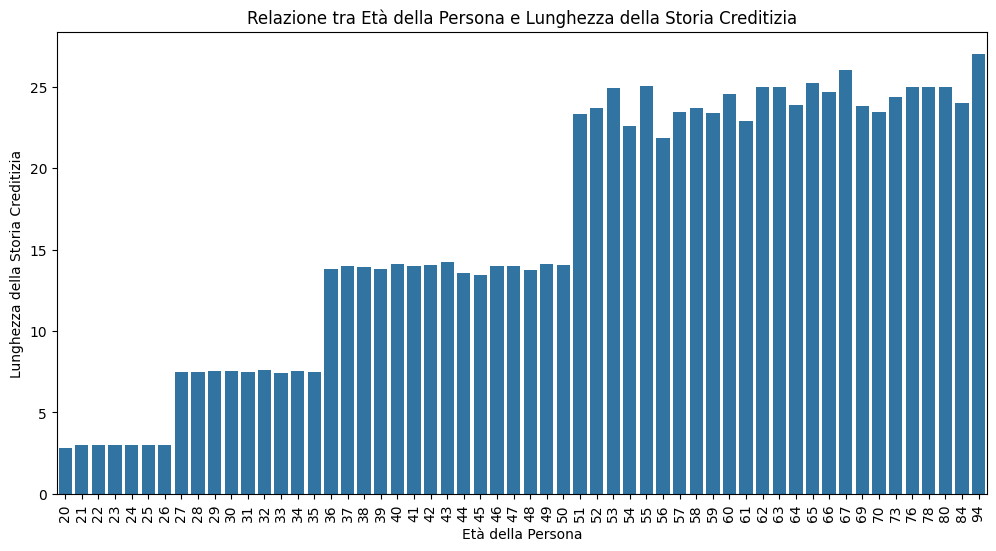

In [18]:
# Filtrare i dati per considerare solo le età fino a 100 anni
filtered_df = df[df['person_age'] <= 100]

# Configurazione della dimensione della figura
plt.figure(figsize=(12, 6))

# Creazione del grafico a barre
sns.barplot(x='person_age', y='cb_person_cred_hist_length', data=filtered_df, errorbar=None)

# Titolo e etichette del grafico
plt.title('Relazione tra Età della Persona e Lunghezza della Storia Creditizia')
plt.xlabel('Età della Persona')
plt.ylabel('Lunghezza della Storia Creditizia')

# Mostro il grafico
plt.xticks(rotation=90)  # Ruota le etichette dell'asse x per migliorare la leggibilità
plt.show()



Questo grafico a barre mostra la relazione tra l'età delle persone e la lunghezza della loro storia creditizia. Si può osservare che la lunghezza della storia creditizia tende ad aumentare con l'aumentare dell'età, il che è intuibile poiché le persone più anziane hanno avuto più tempo per costruire una storia creditizia. La lunghezza della storia creditizia aumenta in modo significativo a partire dai 30 anni e continua a crescere fino ai 100 anni.

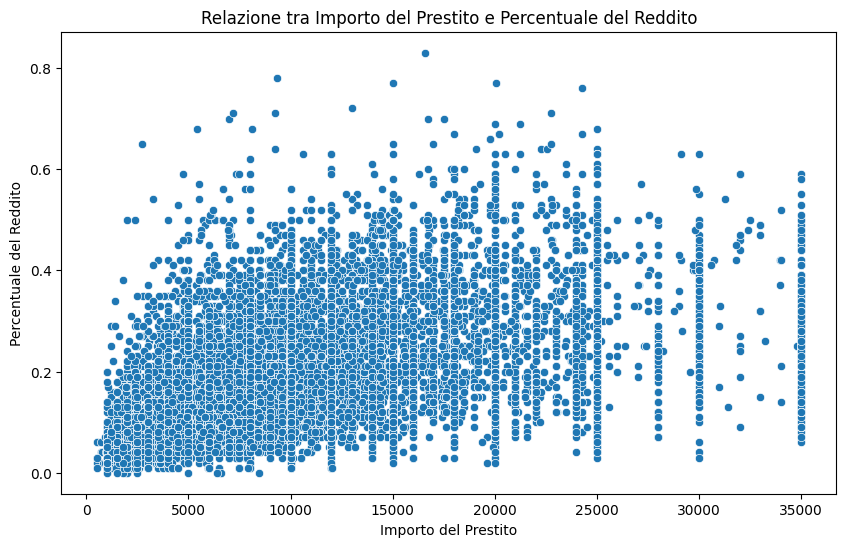

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='loan_percent_income', data=df)
plt.title('Relazione tra Importo del Prestito e Percentuale del Reddito')
plt.xlabel('Importo del Prestito')
plt.ylabel('Percentuale del Reddito')
plt.show()


 Questo grafico a dispersione mostra la relazione tra l'importo del prestito e la percentuale del reddito che rappresenta. Si può notare una distribuzione ampia e sparsa dei punti, indicando che non c'è una relazione lineare forte tra l'importo del prestito e la percentuale del reddito. Tuttavia, ci sono alcune tendenze visibili, come la concentrazione di prestiti più piccoli che rappresentano una percentuale minore del reddito e prestiti più grandi che rappresentano una percentuale maggiore del reddito.

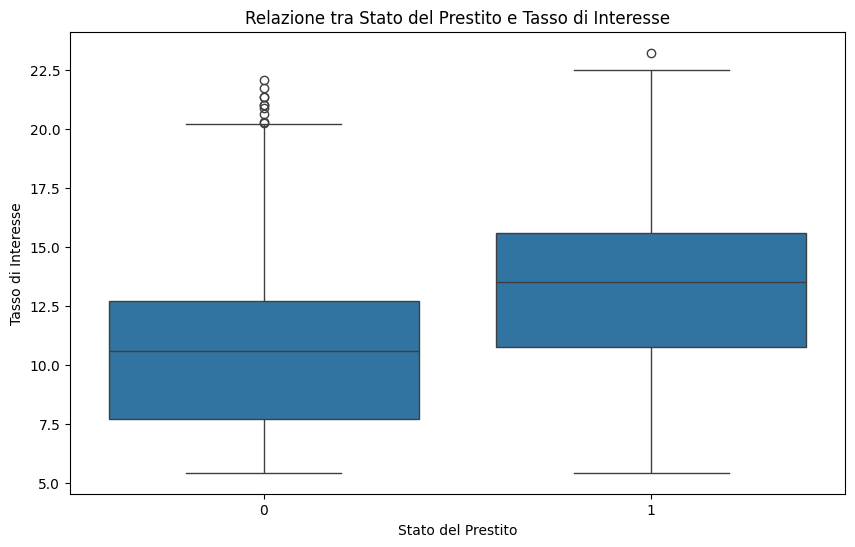

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)
plt.title('Relazione tra Stato del Prestito e Tasso di Interesse')
plt.xlabel('Stato del Prestito')
plt.ylabel('Tasso di Interesse')
plt.show()


 Questo Box plot mostra la relazione tra lo stato del prestito (0 = non in default, 1 = in default) e il tasso di interesse. I prestiti in default tendono ad avere tassi di interesse più alti rispetto a quelli non in default. La mediana del tasso di interesse è più alta per i prestiti in default, indicando che i prestiti con tassi di interesse più alti hanno una maggiore probabilità di essere in default.

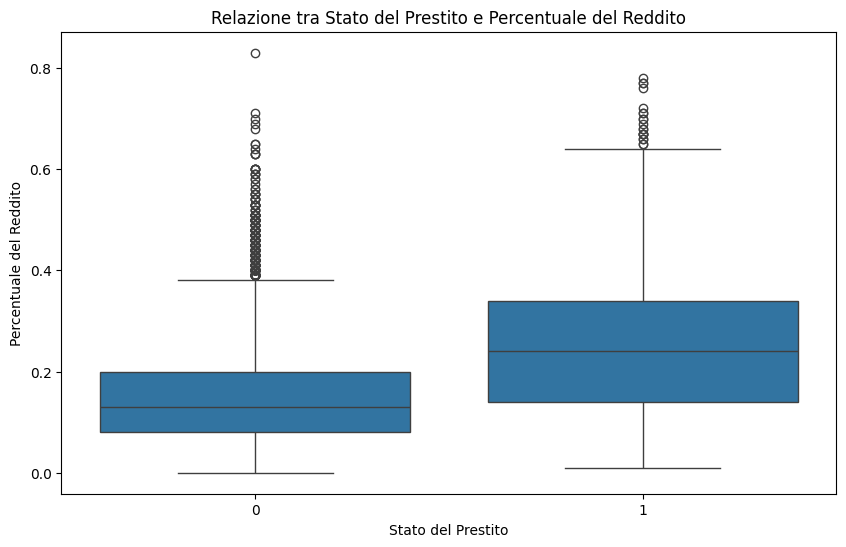

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_percent_income', data=df)
plt.title('Relazione tra Stato del Prestito e Percentuale del Reddito')
plt.xlabel('Stato del Prestito')
plt.ylabel('Percentuale del Reddito')
plt.show()


Questo Box plot mostra la relazione tra lo stato del prestito e la percentuale del reddito. I prestiti in default tendono a rappresentare una percentuale maggiore del reddito rispetto ai prestiti non in default. La mediana della percentuale del reddito è più alta per i prestiti in default, suggerendo che prestiti che rappresentano una porzione maggiore del reddito del mutuatario hanno una maggiore probabilità di essere in default.

Variabili Categoriche

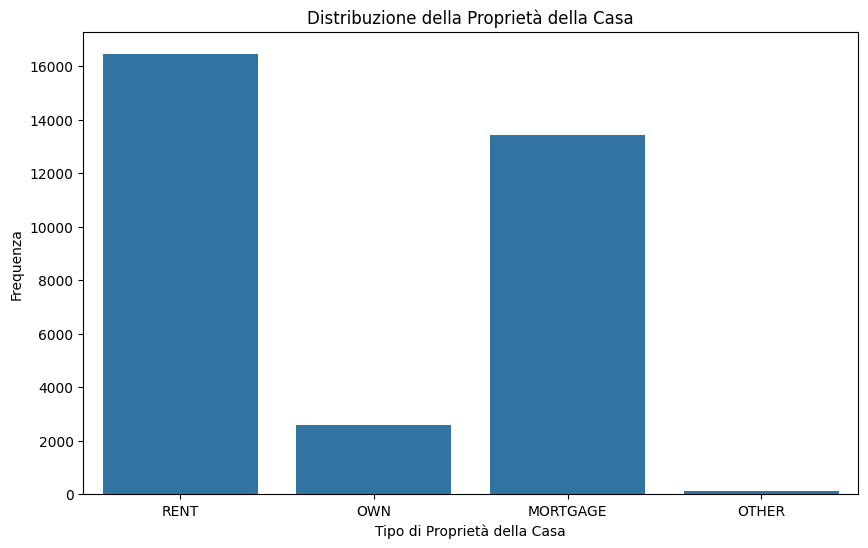

In [21]:
# Configurazione della dimensione della figura
plt.figure(figsize=(10, 6))

# Creazione del grafico a barre
sns.countplot(x='person_home_ownership', data=df)
plt.title('Distribuzione della Proprietà della Casa')
plt.xlabel('Tipo di Proprietà della Casa')
plt.ylabel('Frequenza')

# Mostro il grafico
plt.show()


 La maggior parte dei richiedenti sono in affitto  o hanno un mutuo . Pochi richiedenti possiedono la casa  o hanno altre forme di proprietà .

Considerazioni: La proprietà della casa potrebbe influenzare la stabilità finanziaria del richiedente e quindi il rischio di credito. Questa variabile dovrebbe essere inclusa nel modello di scoring.

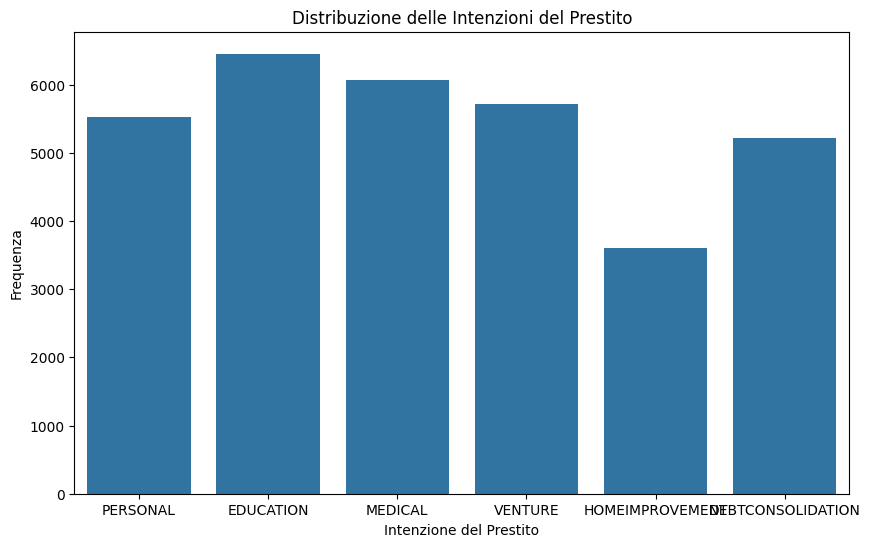

In [22]:
# Configurazione della dimensione della figura
plt.figure(figsize=(10, 6))

# Creazione del grafico a barre
sns.countplot(x='loan_intent', data=df)
plt.title('Distribuzione delle Intenzioni del Prestito')
plt.xlabel('Intenzione del Prestito')
plt.ylabel('Frequenza')

# Mostro il grafico
plt.show()


Gli intenti più comuni per i prestiti sono EDUCATION, MEDICAL e PERSONAL, mentre HOMEIMPROVEMENT ha il numero più basso di richieste.

Considerazioni: Differenti intenti di prestito possono avere diversi livelli di rischio associati. Ad esempio, i prestiti per scopi educativi potrebbero avere tassi di default differenti rispetto ai prestiti per scopi personali.

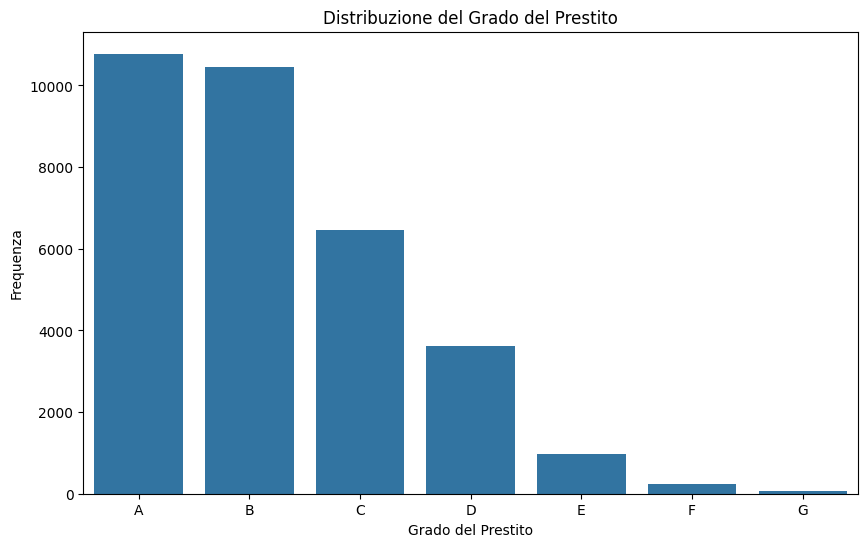

In [25]:
# Ordine dei gradi del prestito
loan_grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Configurazione della dimensione della figura
plt.figure(figsize=(10, 6))

# Creazione del grafico a barre
sns.countplot(x='loan_grade', data=df, order=loan_grade_order)
plt.title('Distribuzione del Grado del Prestito')
plt.xlabel('Grado del Prestito')
plt.ylabel('Frequenza')

# Mostro il grafico
plt.show()


Questa distribuzione può essere utile per capire la qualità complessiva dei prestiti nel dataset e potrebbe influenzare ulteriori analisi relative al rischio di credito associato ai diversi gradi di prestito.

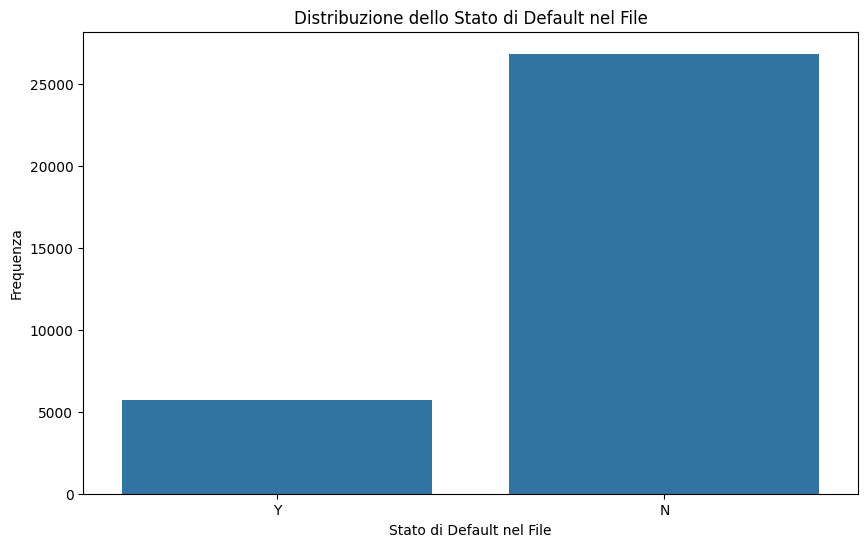

In [26]:
# Configurazione della dimensione della figura
plt.figure(figsize=(10, 6))

# Creazione del grafico a barre
sns.countplot(x='cb_person_default_on_file', data=df)
plt.title('Distribuzione dello Stato di Default nel File')
plt.xlabel('Stato di Default nel File')
plt.ylabel('Frequenza')

# Mostro il grafico
plt.show()


Feature Selection

In [29]:
# Gestione dei valori mancanti
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# Codifica delle variabili categoriali
df = pd.get_dummies(df, drop_first=True)

# Separazione delle variabili dipendenti e indipendenti
X = df.drop('loan_status', axis=1)
y = df['loan_status']


Random Forest

In [30]:
# Divisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestramento del modello Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

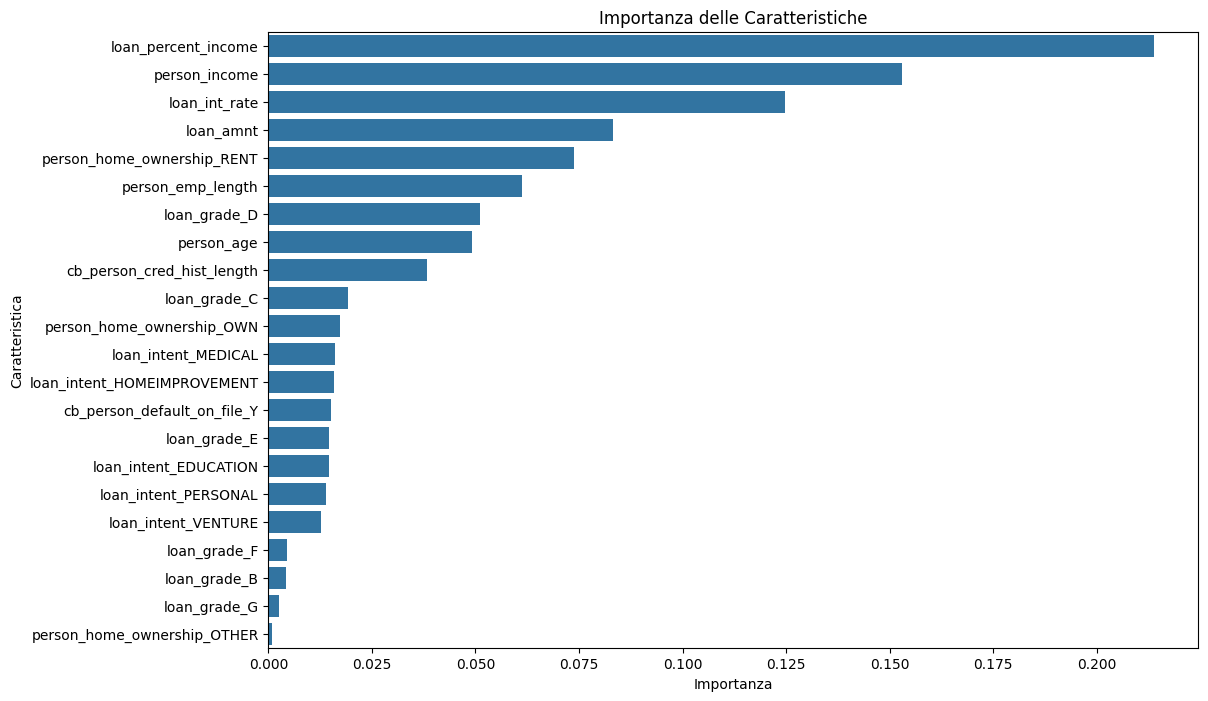

In [31]:
# Estrazione dell'importanza delle caratteristiche
importances = model.feature_importances_
features = X.columns

# Creazione di un dataframe per l'importanza delle caratteristiche
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualizzazione dell'importanza delle caratteristiche
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importanza delle Caratteristiche')
plt.xlabel('Importanza')
plt.ylabel('Caratteristica')
plt.show()


1. loan_percent_income:
Importanza: La caratteristica più importante.
Descrizione: Rappresenta la percentuale del reddito del richiedente che viene utilizzata per il pagamento del prestito. Una percentuale elevata può indicare che una parte significativa del reddito è destinata al pagamento del prestito, aumentando il rischio di default.

2. person_income:
Importanza: Seconda caratteristica più importante.
Descrizione: Il reddito della persona. Le persone con redditi più alti hanno generalmente una maggiore capacità di rimborsare i prestiti, riducendo il rischio di default.

3. loan_int_rate:
Importanza: Terza caratteristica più importante.
Descrizione: Il tasso di interesse del prestito. Prestiti con tassi di interesse più alti possono essere associati a un rischio maggiore di default, poiché comportano pagamenti più elevati.

4. loan_amnt:
Importanza: Quarta caratteristica più importante.
Descrizione: L'importo del prestito. Prestiti di importo maggiore possono rappresentare un rischio maggiore per il prestatore, poiché richiedono una maggiore capacità di rimborso da parte del richiedente.

5. person_home_ownership_RENT:
Importanza: Quinta caratteristica più importante.
Descrizione: Indica se la persona vive in affitto. Le persone che affittano potrebbero avere comportamenti di rischio diversi rispetto a quelle che possiedono una casa.

6. person_emp_length:
Importanza: Sesta caratteristica più importante.
Descrizione: La lunghezza dell'impiego della persona. Una maggiore stabilità lavorativa (periodo di impiego più lungo) può ridurre il rischio di default.

7. loan_grade_D:
Importanza: Settima caratteristica più importante.
Descrizione: Il grado del prestito. I prestiti con un grado D possono essere considerati di qualità inferiore rispetto ad altri gradi, indicando un rischio maggiore.

Random Forest

In [33]:
# Gestione dei valori mancanti
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

# Codifica delle variabili categoriali
df = pd.get_dummies(df, drop_first=True)

# Selezione delle caratteristiche più importanti
important_features = [
    'loan_percent_income',
    'person_income',
    'loan_int_rate',
    'loan_amnt',
    'person_home_ownership_RENT',
    'person_emp_length',
    'loan_grade_D'
]

# Separazione delle variabili dipendenti e indipendenti
X = df[important_features]
y = df['loan_status']

# Divisione del dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestramento del modello Random Forest con le caratteristiche selezionate
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Valutazione del modello
score = model.score(X_test, y_test)
print(f'Accuratezza del modello con le caratteristiche selezionate: {score:.4f}')


Accuratezza del modello con le caratteristiche selezionate: 0.9049


Ottimizzazione

In [42]:
# Definizione dei parametri per la Grid Search per Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Creazione del modello Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Creazione della Grid Search per Random Forest
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Migliori parametri per Random Forest
print(f'Migliori parametri per Random Forest: {grid_search_rf.best_params_}')

# Valutazione del modello Random Forest ottimizzato
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Migliori parametri per Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7613
           1       0.90      0.65      0.76      2162

    accuracy                           0.91      9775
   macro avg       0.90      0.82      0.85      9775
weighted avg       0.91      0.91      0.90      9775



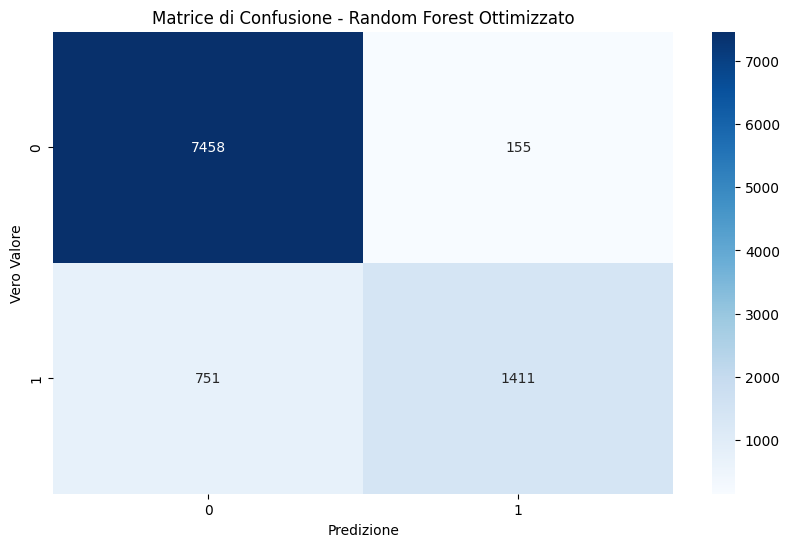

In [45]:
# Visualizzazione della matrice di confusione per Random Forest ottimizzato
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - Random Forest Ottimizzato')
plt.xlabel('Predizione')
plt.ylabel('Vero Valore')
plt.show()

XGBOOST

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7613
           1       0.91      0.67      0.77      2162

    accuracy                           0.91      9775
   macro avg       0.91      0.82      0.86      9775
weighted avg       0.91      0.91      0.91      9775



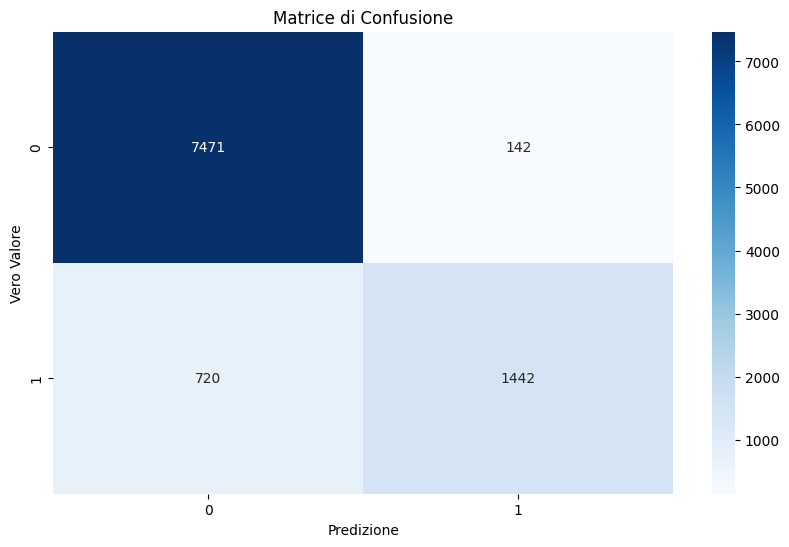

In [39]:
# Addestramento del modello XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predizioni sul set di test
y_pred = xgb_model.predict(X_test)

# Report di classificazione
report = classification_report(y_test, y_pred)
print(report)

# Matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Visualizzazione della matrice di confusione
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione')
plt.xlabel('Predizione')
plt.ylabel('Vero Valore')
plt.show()

Il modello XGBoost offre prestazioni solide e una leggera miglioramento nella gestione della classe 1 rispetto a Random Forest.

Il modello è particolarmente efficace nel classificare correttamente i prestiti non in default, ma ha margini di miglioramento nel rilevare tutti i prestiti in default



Ottimizzazione

In [43]:
# Definizione dei parametri per la Grid Search per XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Creazione del modello XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Creazione della Grid Search per XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Migliori parametri per XGBoost
print(f'Migliori parametri per XGBoost: {grid_search_xgb.best_params_}')

# Valutazione del modello XGBoost ottimizzato
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Migliori parametri per XGBoost: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100, 'subsample': 1.0}
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7613
           1       0.91      0.66      0.76      2162

    accuracy                           0.91      9775
   macro avg       0.91      0.82      0.85      9775
weighted avg       0.91      0.91      0.90      9775



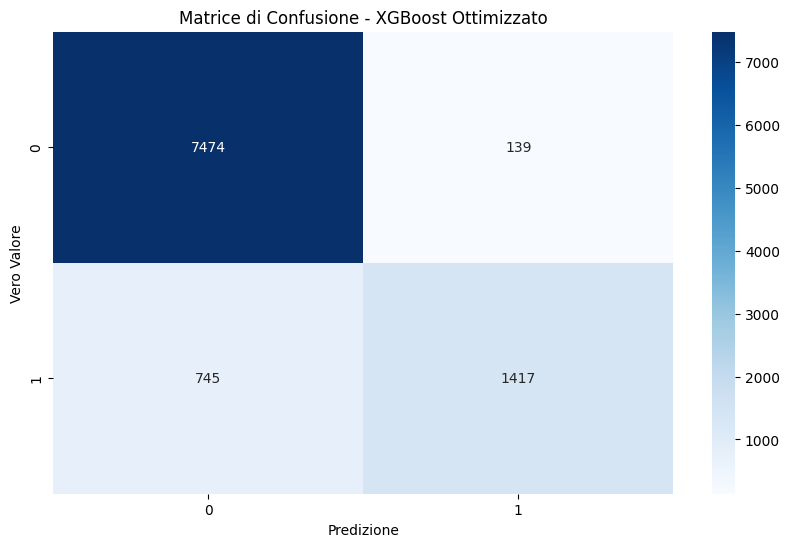

In [44]:
# Visualizzazione della matrice di confusione per XGBoost ottimizzato
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice di Confusione - XGBoost Ottimizzato')
plt.xlabel('Predizione')
plt.ylabel('Vero Valore')
plt.show()

Comparazione dei Modelli Ottimizzati:

Accuratezza: Entrambi i modelli ottimizzati hanno raggiunto un'accuratezza del 91%.

Prestazioni Generali: Il modello XGBoost ottimizzato ha un leggero vantaggio in termini di bilanciamento tra precisione e recall per la classe 1, rendendolo leggermente migliore nella gestione dei prestiti in default.

Entrambi i modelli sono efficaci, ma XGBoost sembra offrire un leggero miglioramento nella gestione delle predizioni di default.

CONCLUSIONI E RACCOMANDAZIONI

L'obiettivo finale del progetto era creare un sistema di credit scoring accurato e affidabile che potesse supportare le istituzioni finanziarie nella gestione del rischio di credito. Attraverso l'uso di tecniche avanzate di data science e machine learning, abbiamo sviluppato e ottimizzato modelli predittivi che sono in grado di identificare la probabilità di default sui prestiti con un'accuratezza del 91%.

RISULTATI PRINCIPALI

1. Modelli Predittivi Efficaci:
Random Forest e XGBoost sono stati entrambi implementati e ottimizzati, con XGBoost che ha mostrato un leggero miglioramento nel bilanciamento tra precisione e recall per la classe dei prestiti in default.

2. Feature Engineering:
La creazione di nuove caratteristiche come il rapporto debito/reddito e la stabilità dell'impiego ha contribuito a migliorare le performance del modello.

3. Ottimizzazione:
La Grid Search ha permesso di trovare i parametri ottimali per entrambi i modelli, migliorando ulteriormente le loro prestazioni.

In conclusione, il progetto ha raggiunto con successo l'obiettivo di sviluppare un sistema di credit scoring che possa supportare efficacemente le istituzioni finanziarie nella gestione del rischio di credito. Implementando il modello XGBoost ottimizzato e adottando un approccio di miglioramento continuo, le istituzioni finanziarie possono beneficiare di un sistema di credit scoring affidabile e accurato, riducendo significativamente il rischio di prestiti in default.